In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("C:\\Users\\Abhishek\\Downloads\\international-airline-passengers.csv")

In [3]:
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [5]:
cols=['ym','cnt']
data.columns=cols

In [6]:
data.columns

Index(['ym', 'cnt'], dtype='object')

In [7]:
data.head()

,ym,cnt
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
len(data)

144

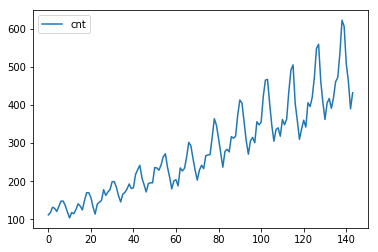

In [9]:
data.plot.line()

### Seems like data have some trend. Let's explore it and make some forecasting using Prophet...

In [10]:
train,test=data[:100],data[-44:]

In [11]:
train['ym']=train['ym']+'-01'

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
#train = train.set_index('ym')

In [13]:
data.head(5)

,ym,cnt
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
data = data.rename(columns={'ym': 'ds', 'cnt': 'y'})

In [15]:
train.head(5)

,ym,cnt
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [16]:
train.tail(5)

,ym,cnt
95,1956-12-01,306
96,1957-01-01,315
97,1957-02-01,301
98,1957-03-01,356
99,1957-04-01,348


In [17]:
model=Prophet(interval_width=0.95, seasonality_mode='multiplicative',yearly_seasonality='auto', mcmc_samples=30, 
              weekly_seasonality=False, daily_seasonality=False)

In [18]:
model.fit(data)

In [19]:
future = model.make_future_dataframe(periods=44,freq='MS')
future.tail()

,ds
183,1964-04-01
184,1964-05-01
185,1964-06-01
186,1964-07-01
187,1964-08-01


In [20]:
future_forecast = model.predict(future)

In [21]:
future_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,116.035756,83.170011,129.011960,110.407115,121.765524,-0.089870,-0.112210,-0.063110,-0.089870,-0.112210,-0.063110,0.0,0.0,0.0,105.607659
1,1949-02-01,117.494135,78.779556,128.541524,112.232630,122.652380,-0.118455,-0.154019,-0.088452,-0.118455,-0.154019,-0.088452,0.0,0.0,0.0,103.576359
2,1949-03-01,118.811380,93.723247,138.955562,113.881482,123.607084,-0.027437,-0.038561,-0.007582,-0.027437,-0.038561,-0.007582,0.0,0.0,0.0,115.551603
3,1949-04-01,120.269758,95.654826,141.313334,115.706996,124.664078,-0.017009,-0.032819,0.002119,-0.017009,-0.032819,0.002119,0.0,0.0,0.0,118.224100
4,1949-05-01,121.681092,98.409657,145.117546,117.473623,125.686975,-0.011615,-0.035300,0.003938,-0.011615,-0.035300,0.003938,0.0,0.0,0.0,120.267824
5,1949-06-01,123.139471,113.767442,161.639408,119.299137,126.743969,0.125312,0.102386,0.149268,0.125312,0.102386,0.149268,0.0,0.0,0.0,138.570313
6,1949-07-01,124.574065,135.226504,179.792597,120.783973,128.202623,0.267878,0.249940,0.288670,0.267878,0.249940,0.288670,0.0,0.0,0.0,157.944710
7,1949-08-01,126.056479,134.417568,180.088952,122.273216,129.709899,0.247729,0.226936,0.270662,0.247729,0.226936,0.270662,0.0,0.0,0.0,157.284380
8,1949-09-01,127.538893,111.127300,156.867873,123.762459,131.217174,0.058937,0.033676,0.078341,0.058937,0.033676,0.078341,0.0,0.0,0.0,135.055700
9,1949-10-01,128.973488,95.845955,142.730163,125.111931,132.675828,-0.079145,-0.113252,-0.055602,-0.079145,-0.113252,-0.055602,0.0,0.0,0.0,118.765845


Text(0.5, 1.0, 'Passanger Count')

<Figure size 1296x432 with 0 Axes>

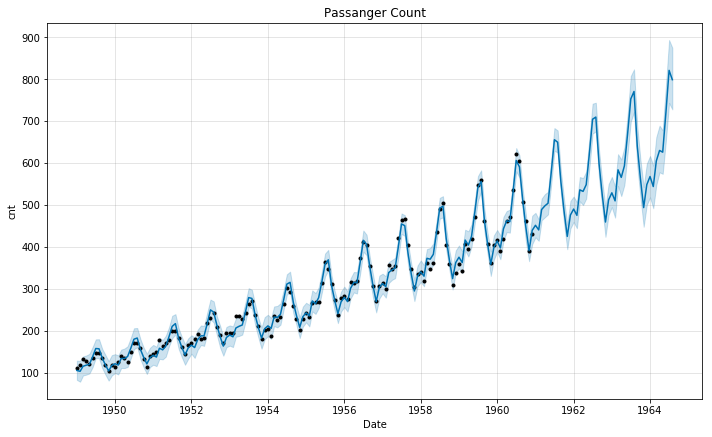

In [22]:
plt.figure(figsize=(18, 6))
model.plot(future_forecast, xlabel = 'Date', ylabel = 'cnt')
plt.title('Passanger Count')

In [23]:
#### Testing on test data

In [24]:
data['predicted']=np.round(future_forecast['yhat'])

Text(0.5, 1.0, 'Actual vs. Predicted Estimate')

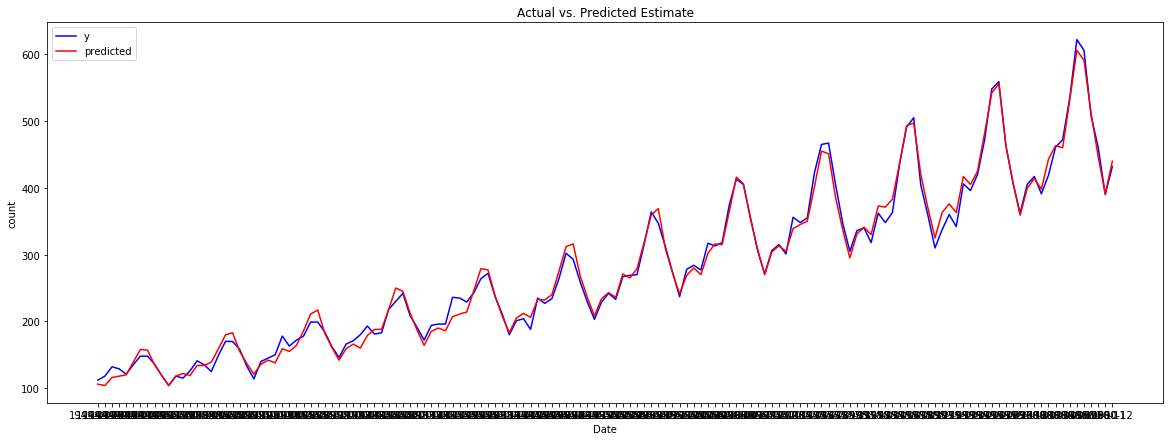

In [25]:
plt.figure(figsize=(20, 7))
plt.plot(data['ds'], data['y'], 'b-')
plt.plot(data['ds'], data['predicted'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Actual vs. Predicted Estimate')

In [26]:
from fbprophet.diagnostics import cross_validation
#df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
#df_cv.head()

In [27]:
??cross_validation

In [28]:
df_cv = cross_validation(model, initial='1000 days', period='500 days', horizon = '1000 days')
df_cv

INFO:fbprophet:Making 5 forecasts with cutoffs between 1952-09-14 00:00:00 and 1958-03-07 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1952-10-01,183.275092,155.141670,212.685141,191,1952-09-14
1,1952-11-01,157.048348,126.223217,183.968544,172,1952-09-14
2,1952-12-01,191.494869,163.903660,227.687355,194,1952-09-14
3,1953-01-01,193.710111,168.040604,215.449219,196,1952-09-14
4,1953-02-01,209.161753,186.164917,230.273248,196,1952-09-14
5,1953-03-01,225.824818,205.480130,248.366626,236,1952-09-14
6,1953-04-01,213.092763,192.386939,232.349864,235,1952-09-14
7,1953-05-01,209.404688,189.719105,229.122682,229,1952-09-14
8,1953-06-01,241.735024,217.169010,263.053551,243,1952-09-14
9,1953-07-01,261.853514,236.631952,287.396418,264,1952-09-14


In [29]:
#df_cv = cross_validation(model,horizon='180 days')
#df_cv

In [30]:
df_cv['cutoff'].unique()

array(['1952-09-14T00:00:00.000000000', '1954-01-27T00:00:00.000000000',
       '1955-06-11T00:00:00.000000000', '1956-10-23T00:00:00.000000000',
       '1958-03-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [35]:
df_cv = cross_validation(model,horizon='1000 days')
df_cv

INFO:fbprophet:Making 1 forecasts with cutoffs between 1958-03-07 00:00:00 and 1958-03-07 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1958-04-01,387.838089,360.466519,417.048386,348,1958-03-07
1,1958-05-01,396.470383,372.985686,419.846888,363,1958-03-07
2,1958-06-01,445.972863,421.928824,469.516446,435,1958-03-07
3,1958-07-01,501.942830,479.235746,522.898187,491,1958-03-07
4,1958-08-01,492.473337,470.946482,514.045355,505,1958-03-07
5,1958-09-01,435.990302,409.771163,462.264594,404,1958-03-07
6,1958-10-01,379.804383,354.651822,400.883909,359,1958-03-07
7,1958-11-01,330.932344,307.060714,356.827955,310,1958-03-07
8,1958-12-01,375.666867,351.204270,399.994877,337,1958-03-07
9,1959-01-01,379.066907,354.253033,404.552208,360,1958-03-07


In [ ]:
#df_cv = cross_validation(model,horizon='700 days')
#df_cv

In [36]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
2,86 days,942.581211,30.701485,28.093779,0.077302,0.333333
3,116 days,453.471935,21.294880,18.462025,0.046572,0.666667
4,147 days,132.355518,11.504587,11.480786,0.024106,1.000000
5,178 days,433.347422,20.816998,18.486599,0.042092,0.666667
6,208 days,537.706362,23.188496,21.773783,0.053980,0.666667


In [37]:
df_p

,horizon,mse,rmse,mae,mape,coverage
2,86 days,942.581211,30.701485,28.093779,0.077302,0.333333
3,116 days,453.471935,21.294880,18.462025,0.046572,0.666667
4,147 days,132.355518,11.504587,11.480786,0.024106,1.000000
5,178 days,433.347422,20.816998,18.486599,0.042092,0.666667
6,208 days,537.706362,23.188496,21.773783,0.053980,0.666667
7,239 days,631.454940,25.128767,24.575676,0.068220,0.666667
8,269 days,788.703989,28.083874,26.801198,0.080071,0.666667
9,300 days,765.612181,27.669698,26.222039,0.078409,0.666667
10,331 days,954.181329,30.889826,29.805896,0.086782,0.333333
11,359 days,511.495097,22.616257,21.225432,0.059148,0.666667


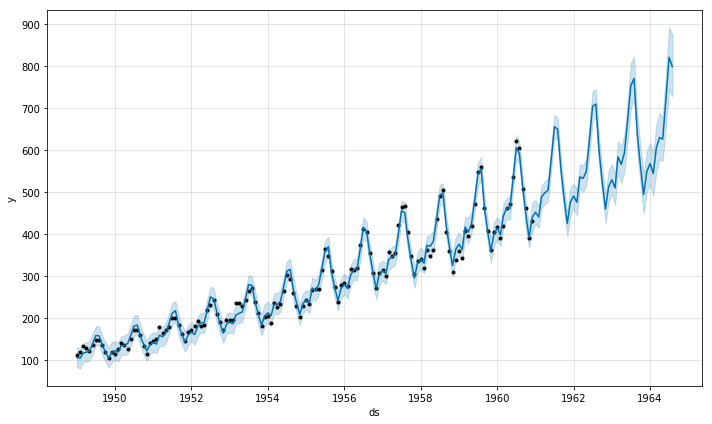

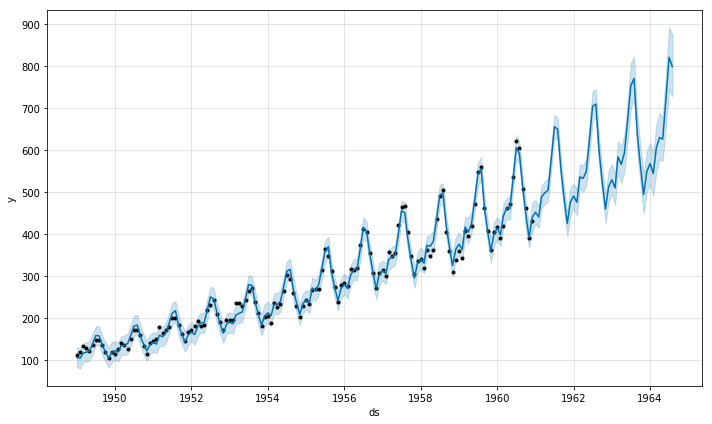

In [38]:
model.plot(future_forecast)

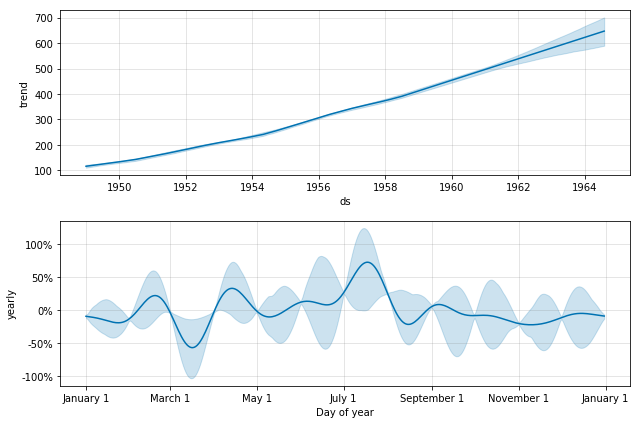

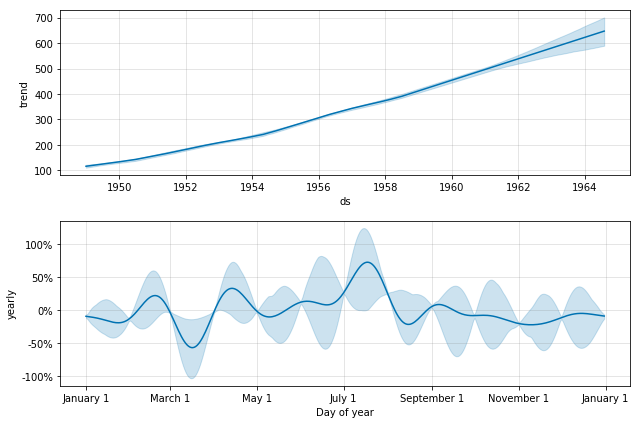

In [39]:
model.plot_components(future_forecast)